## Phishing Detector with LR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('phishing.txt',names=[ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ])

In [3]:
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.shape

(11055, 31)

#### Exercise 1 :
1. Build a phishing website classifier using Logistic Regression with “C” parameter = 100. 
2. Use 70% of data as training data and the remaining 30% as test data
3. Print count of misclassified samples in the test data prediction as well as the accuracy score of the model. 

In [5]:
X=df.drop(['class'],axis=1)
y=df['class']

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=2)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7738, 30)
(3317, 30)
(7738,)
(3317,)


In [7]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=100)
LR.fit(Xtrain,ytrain)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
LRy_pred=LR.predict(Xtest)

In [9]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE=sqrt(mean_squared_error(LRy_pred,ytest))
RMSE

0.5501664724629897

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('\n classification report : \n',classification_report(LRy_pred,ytest))
print('\n Accuracy score : ',accuracy_score(LRy_pred,ytest))
print('\n Confusion matrix : \n',confusion_matrix(LRy_pred,ytest))


 classification report : 
               precision    recall  f1-score   support

          -1       0.90      0.92      0.91      1433
           1       0.94      0.93      0.93      1884

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317


 Accuracy score :  0.9243292131444076

 Confusion matrix : 
 [[1321  112]
 [ 139 1745]]


#### Exercise 2 :
1. Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor.
2. Check accuracy using the test data and compare the accuracy with the previous value.
3. Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

In [11]:
X2=df.drop([ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport','class'],axis=1)
y2=df.drop([ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport'],axis=1)

In [12]:
X2.columns

Index(['PrefixSuffix-', 'AnchorURL'], dtype='object')

In [13]:
y2.columns

Index(['class'], dtype='object')

In [14]:
X2train,X2test,y2train,y2test=train_test_split(X2,y2,test_size=0.3,random_state=2)
print(X2train.shape)
print(X2test.shape)
print(y2train.shape)
print(y2test.shape)

(7738, 2)
(3317, 2)
(7738, 1)
(3317, 1)


In [15]:
LR2=LogisticRegression(C=100)
LR2.fit(X2train,y2train)
LR2y_pred=LR2.predict(X2test)

C:\Users\jayachap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
RMSE2=sqrt(mean_squared_error(LR2y_pred,y2test))
RMSE2

0.78882762388178

In [17]:
print('\n classification report : \n',classification_report(LR2y_pred,y2test))
print('\n Accuracy score : ',accuracy_score(LR2y_pred,y2test))
print('\n Confusion matrix : \n',confusion_matrix(LR2y_pred,y2test))


 classification report : 
               precision    recall  f1-score   support

          -1       0.65      0.99      0.79       958
           1       1.00      0.78      0.88      2359

    accuracy                           0.84      3317
   macro avg       0.82      0.89      0.83      3317
weighted avg       0.90      0.84      0.85      3317


 Accuracy score :  0.8444377449502563

 Confusion matrix : 
 [[ 951    7]
 [ 509 1850]]


In [18]:
import numpy as np
xx,yy=np.mgrid[-5:5:.01,-5:5:.01]
grid=np.c_[xx.ravel(),yy.ravel()]
probs=LR2.predict_proba(grid)[:,1].reshape(xx.shape)
print(probs)

[[3.08185253e-17 3.19869755e-17 3.31997261e-17 ... 2.85522273e-01
  2.93173849e-01 3.00944108e-01]
 [3.23954491e-17 3.36236866e-17 3.48984913e-17 ... 2.95810216e-01
  3.03620334e-01 3.11545429e-01]
 [3.40530611e-17 3.53441450e-17 3.66841790e-17 ... 3.06309931e-01
  3.14273547e-01 3.22347996e-01]
 ...
 [9.99991982e-01 9.99992275e-01 9.99992557e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.99992373e-01 9.99992651e-01 9.99992920e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.99992744e-01 9.99993009e-01 9.99993264e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


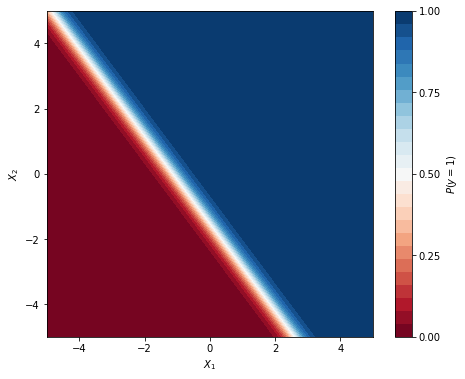

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")	

plt.show()